In [19]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection and Processing

In [2]:
# Loading the data from csv file to a Pandas Dataframe
df = pd.read_csv('/content/calories.csv')

In [3]:
df.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
# Another dataframe for 'Exercise' dataframe
df1 = pd.read_csv('/content/exercise.csv')

In [6]:
df1.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [51]:
df_main = pd.concat([df1, df['Calories']], axis = 1)

In [9]:
df_main.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
df_main.shape

(15000, 9)

In [15]:
# Checking for null values
df_main.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [16]:
# Getting more information from the data
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Data Analysis

In [17]:
# Getting statistical measures about data
df_main.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [20]:
sns.set()

In [21]:
df_main['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

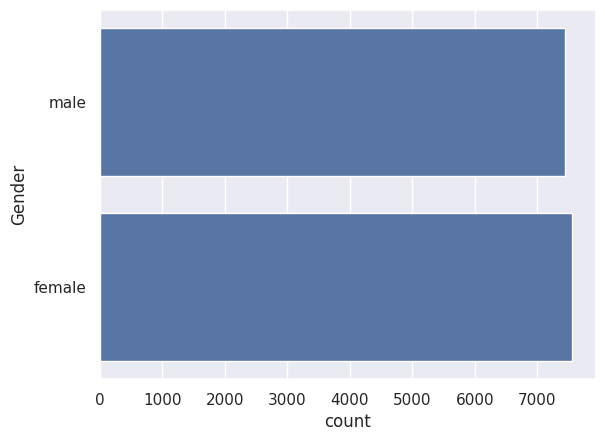

In [22]:
# Making a countplot for 'Gender' column
sns.countplot(df_main['Gender'])

<ipython-input-23-ff5e9c17244c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_main['Age'])


<Axes: xlabel='Age', ylabel='Density'>

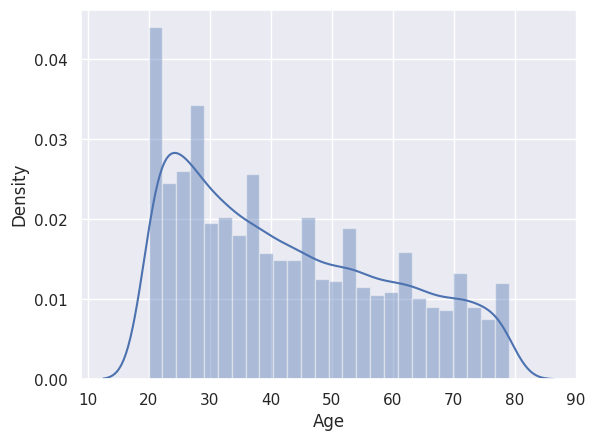

In [23]:
# Finding the distribution of 'Age' column
sns.distplot(df_main['Age'])

<ipython-input-24-49a1c06f518a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_main['Height'])


<Axes: xlabel='Height', ylabel='Density'>

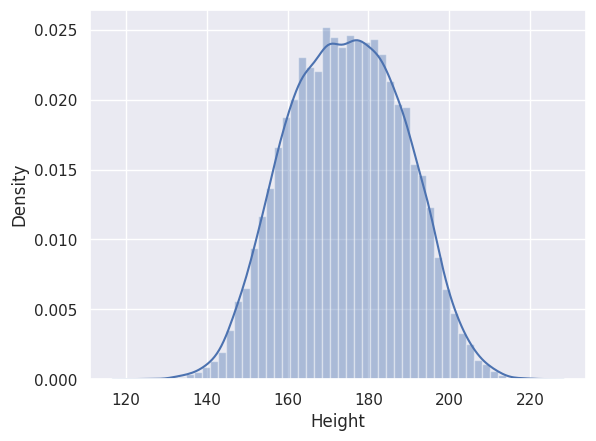

In [24]:
# Finding the distribution of 'Height' column
sns.distplot(df_main['Height'])

<ipython-input-25-c0f4527045eb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_main['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

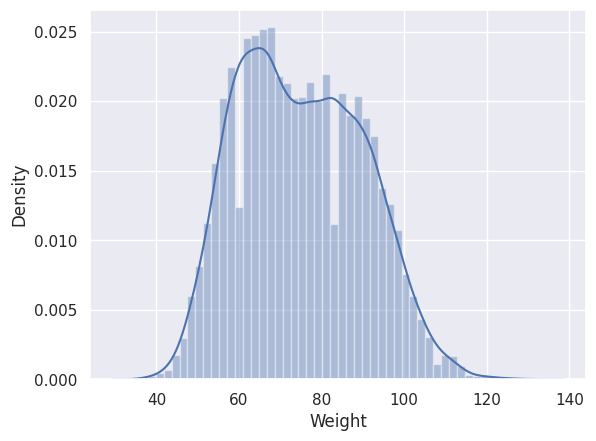

In [25]:
# Finding the distribution of 'Weight' column
sns.distplot(df_main['Weight'])

<ipython-input-26-a57447ea628b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_main['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

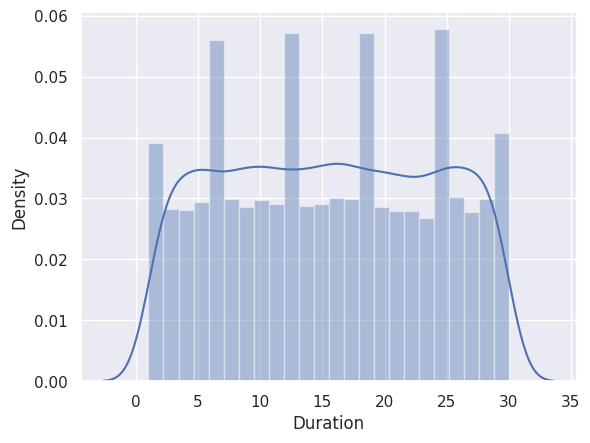

In [26]:
# Finding the distribution of 'Duration' column
sns.distplot(df_main['Duration'])

<ipython-input-27-2bbe89b915ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_main['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

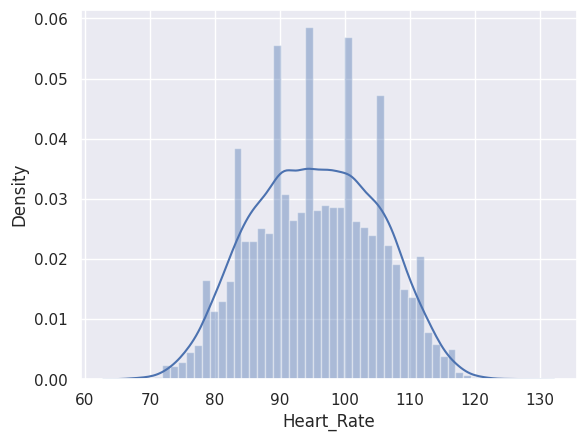

In [27]:
# Finding the distribution of 'Heart_Rate' column
sns.distplot(df_main['Heart_Rate'])

<ipython-input-28-92bb4c85a9cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_main['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

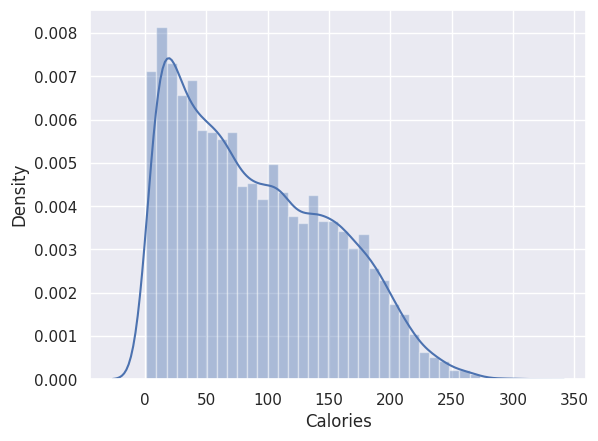

In [28]:
# Finding the distribution of 'Calories' column
sns.distplot(df_main['Calories'])

Finding the Correlation in the dataset

In [52]:
df_main = df_main.replace({'Gender' : {'male' : 1, 'female' : 0}})

In [53]:
corr = df_main.corr()

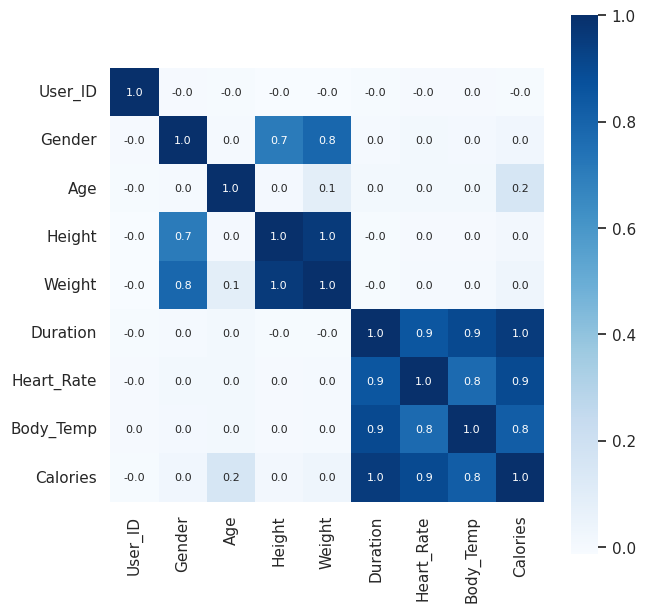

In [54]:
# Constructing a Heatmap to understand the Correlation
plt.figure(figsize = (7,7))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')
plt.show()

In [55]:
df_main.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [56]:
df_main['Gender'].value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

Separating Features and Target

In [57]:
x = df_main.drop(columns = ['User_ID', 'Calories'], axis = 1)
y = df_main['Calories']

In [58]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [59]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting data into Training and Testing data

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [61]:
print(x.shape, x_train.shape, x_test.shape, y.shape, y_train.shape, y_test.shape)

(15000, 7) (12000, 7) (3000, 7) (15000,) (12000,) (3000,)


Model Training

XGBoost Regressor

In [62]:
model = XGBRegressor()

In [63]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [64]:
# Prediction on Training data
y_train_pred = model.predict(x_train)
acc = metrics.mean_absolute_error(y_train_pred, y_train)
print("Accuracy on training data : ", acc)

Accuracy on training data :  0.9322033420062313


In [66]:
# Prediction on Testing data
y_test_pred = model.predict(x_test)
acc = metrics.mean_absolute_error(y_test_pred, y_test)
print("Accuracy on testing data : ", acc)

Accuracy on testing data :  1.4833678883314132


Predictive System

In [70]:
input_data = (0,20,166.0,60.0,14.0,94.0,40.3)

# Converting to NumPy array
input_data_np = np.asarray(input_data)

# Reshaping the Numpy array
input_np_reshape = input_data_np.reshape(1,-1)

predict = model.predict(input_np_reshape)

print("Your approximate calories burnt are : ", predict[0])

Your approximate calories burnt are :  65.85351


**Thank you**